In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.core.pylabtools import figsize

import seaborn as sns

import numpy as np
import pandas as pd

from tqdm import tqdm

import torch

In [2]:
from src.model.setup import image_model_setup
from src.model.CLS_token_probing import ModuleSpecificDecoder
model_name = "facebook/dinov2-base"
dataset_name = "temp_dataset_subsample"

model, image_datasets, _ = image_model_setup(model_name, dataset_name, 1000)
_=model.model.eval()

W0206 11:25:10.986000 42789 torch/distributed/elastic/multiprocessing/redirects.py:29] NOTE: Redirects are currently not supported in Windows or MacOs.


import error: No module named 'triton'


Some weights of Dinov2ForImageClassification were not initialized from the model checkpoint at facebook/dinov2-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


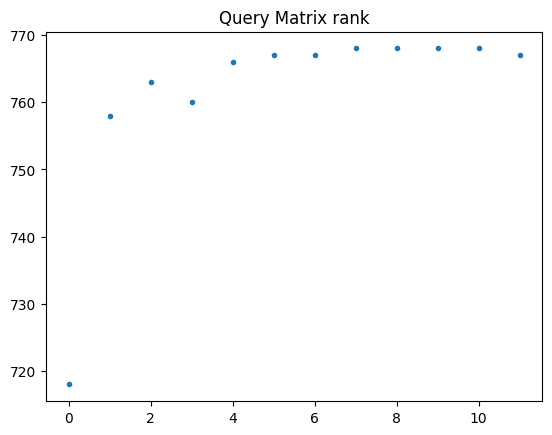

In [17]:
ranks = []
for i in range(12):
    layer = model.model.dinov2.encoder.layer[i]
    ranks.append( torch.linalg.matrix_rank(layer.attention.attention.query.weight).item() )
plt.title('Query Matrix rank')
_=plt.plot(range(12), ranks, '.')

key nullity = 768 - key rank = dimensionality of tokens that are mapped to 0 = uniform selection from values

I'm interested in the drop to n-1 in the last layer... This is a 'pure guessing' dimension.

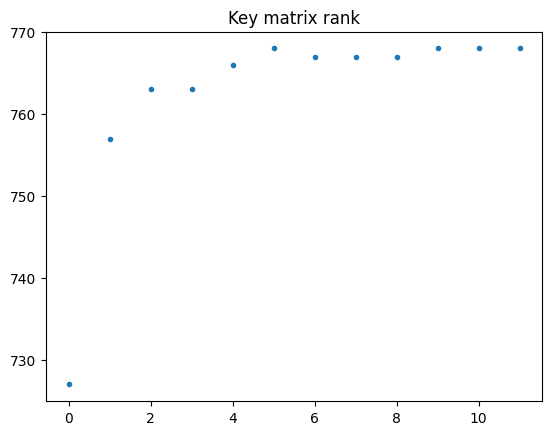

In [18]:
ranks = []
for i in range(12):
    layer = model.model.dinov2.encoder.layer[i]
    ranks.append( torch.linalg.matrix_rank(layer.attention.attention.key.weight).item() )

plt.title('Key matrix rank')
_=plt.plot(range(12), ranks, '.')

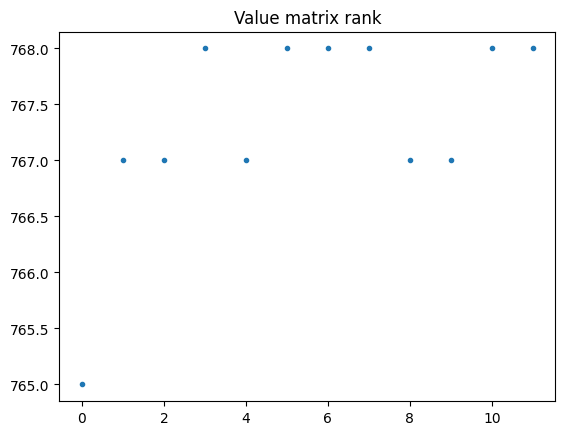

In [20]:
ranks = []
for i in range(12):
    layer = model.model.dinov2.encoder.layer[i]
    ranks.append( torch.linalg.matrix_rank(layer.attention.attention.value.weight).item() )

plt.title('Value matrix rank')
_=plt.plot(range(12), ranks, '.')